# Sleep Survey Analysis

Data collected from a survey-based study of the sleeping habits of individuals within the US. This data was conducted as a pilot study to determine whether or not students were satisfied with the survey.

Here is a description of each of the variables contained within the dataset.

Enough = Do you think that you get enough sleep?
Hours = On average, how many hours of sleep do you get on a weeknight
PhoneReach = Do you sleep with your phone within arms reach?
PhoneTime = Do you use your phone within 30 minutes of falling asleep?
Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
Breakfast = Do you typically eat breakfast?


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations
import plotly.express as px

In [10]:
df_sleep = pd.read_csv("SleepStudyData.csv")
print(df_sleep)

    Enough  Hours PhoneReach PhoneTime  Tired Breakfast
0      Yes    8.0        Yes       Yes      3       Yes
1       No    6.0        Yes       Yes      3        No
2      Yes    6.0        Yes       Yes      2       Yes
3       No    7.0        Yes       Yes      4        No
4       No    7.0        Yes       Yes      2       Yes
..     ...    ...        ...       ...    ...       ...
99      No    7.0        Yes       Yes      2       Yes
100     No    7.0         No       Yes      3       Yes
101    Yes    8.0        Yes       Yes      3       Yes
102    Yes    7.0        Yes       Yes      2       Yes
103    Yes    6.0        Yes       Yes      3       Yes

[104 rows x 6 columns]


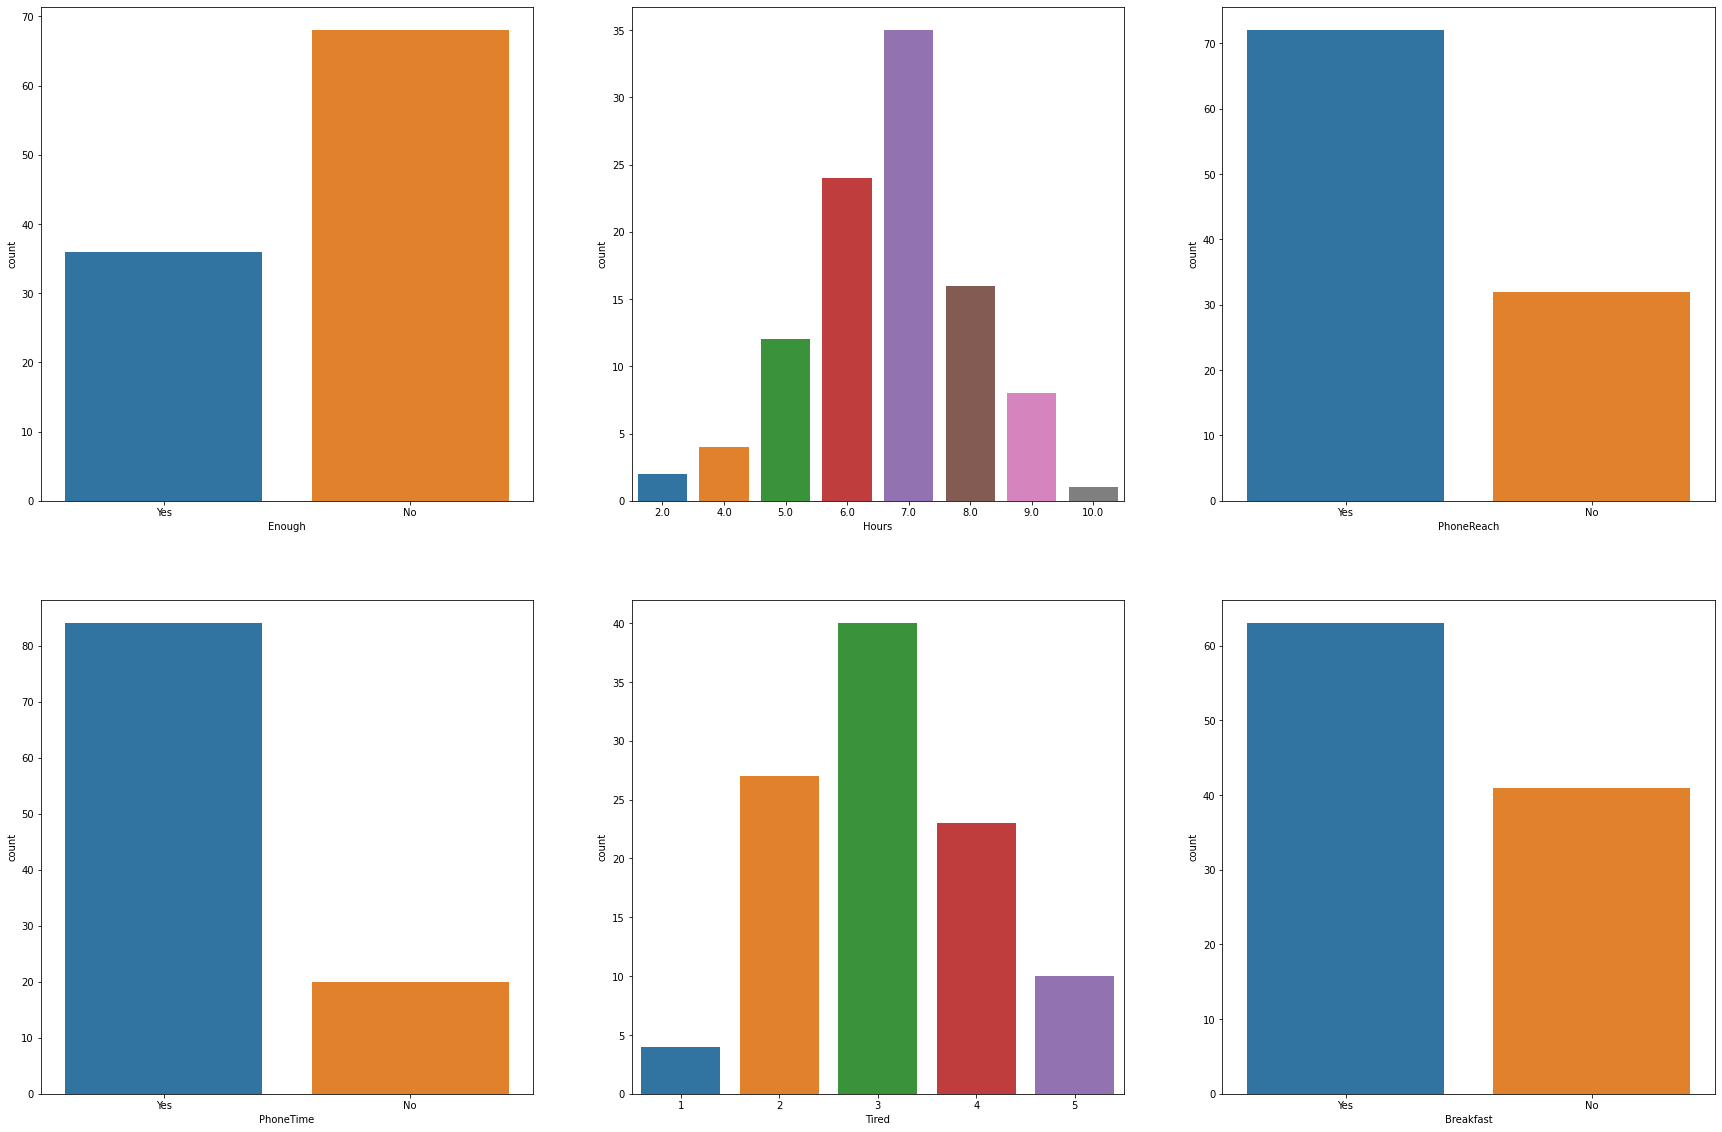

In [11]:
# showing a count plot of each column
plt.figure(figsize=(30,20))
for i, c in enumerate(df_sleep.columns):
    plt.subplot(2,3,i+1)
    sns.countplot(df_sleep[c])
plt.show()

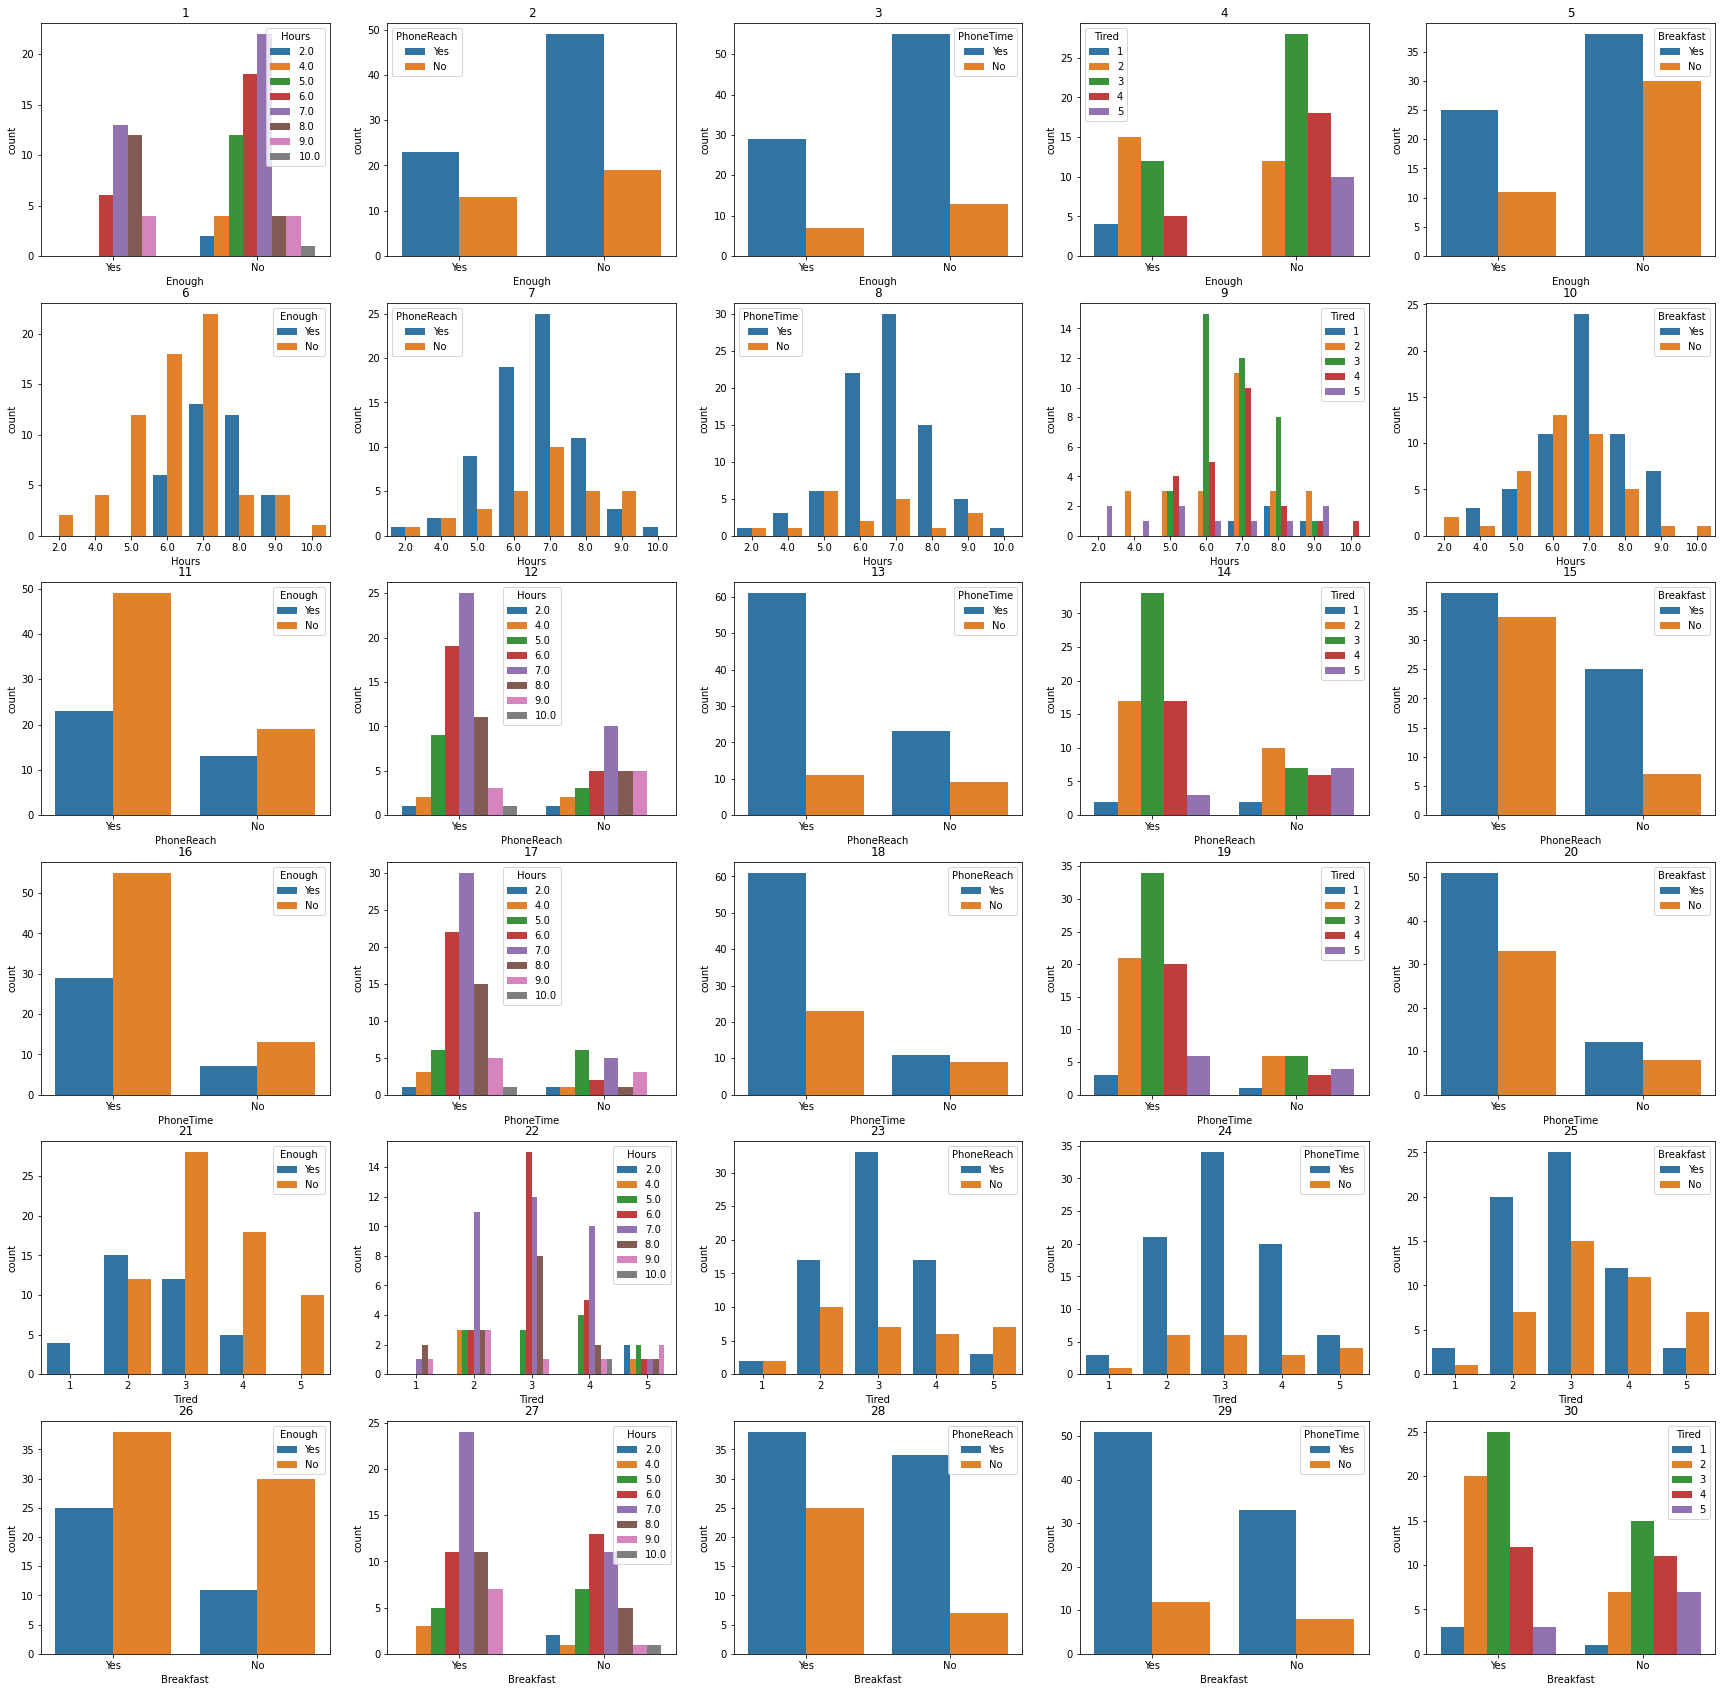

In [12]:
# geting all the permutations with two columns
column_permutations = permutations(df_sleep.columns,2)

# visualizing the obtained permutations (count plot on the first column with different colors for each category)
plt.figure(figsize=(30,30))
for i, c in enumerate(column_permutations):
    plt.subplot(6,5,i+1)
    plt.title(i+1)
    sns.countplot(df_sleep[c[0]], hue=df_sleep[c[1]])
plt.show()

## Phone Reach and Phone Time

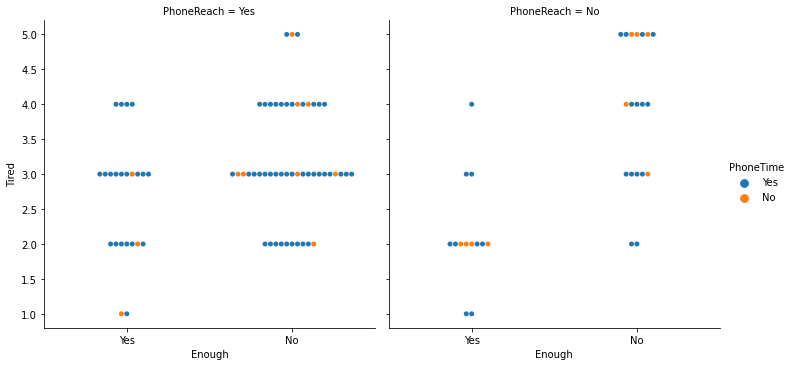

In [14]:
# swarm plot with two columns
sns.catplot(x="Enough", y="Tired",
            hue="PhoneTime", col="PhoneReach",
            data=df_sleep, kind="swarm")
plt.show()

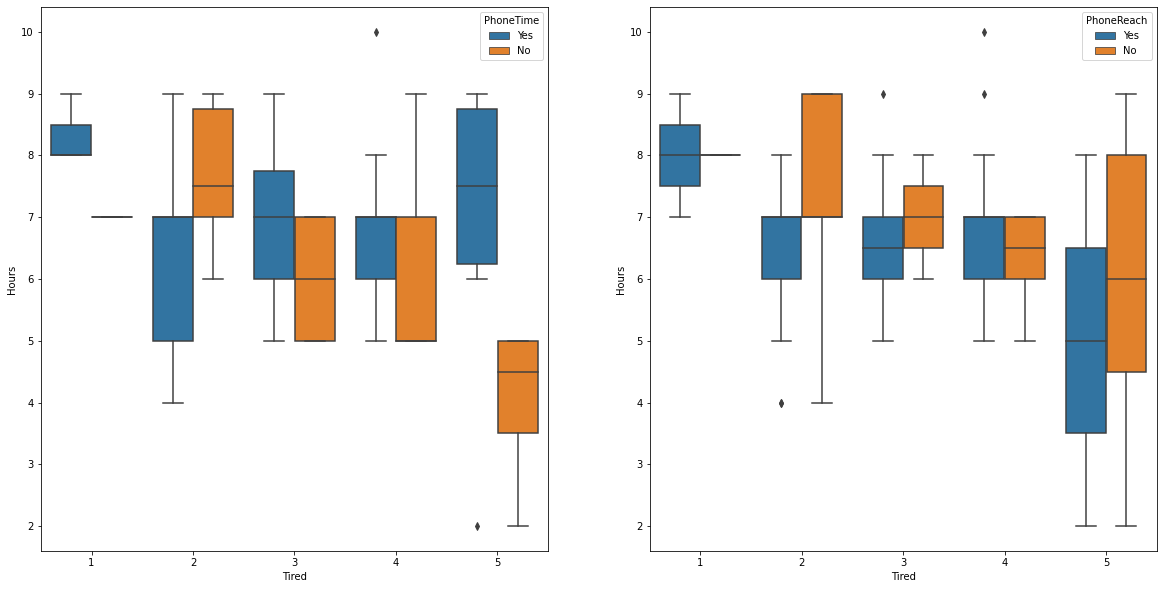

In [15]:
# visualizing boxplots grouped by Tired with different colors for PhoneTime and PhoneReach 
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x="Tired",y="Hours",hue="PhoneTime",data=df_sleep)
plt.subplot(1,2,2)
sns.boxplot(x="Tired",y="Hours",hue="PhoneReach",data=df_sleep)
plt.show()

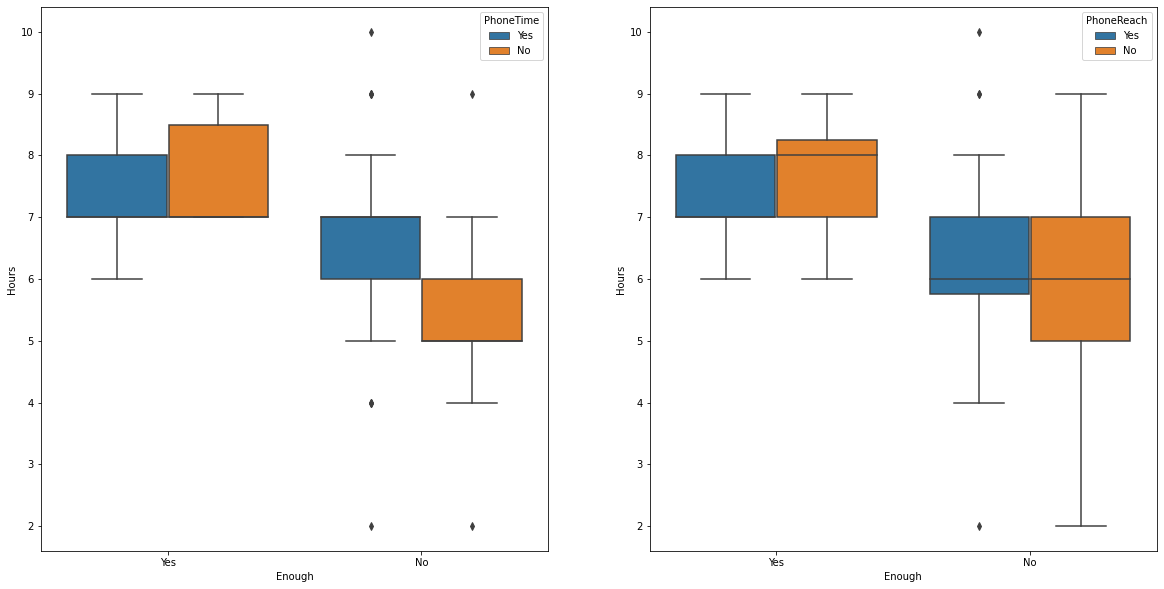

In [16]:
# visualizing boxplots grouped by Enough with different colors for PhoneTime and PhoneReach 
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x="Enough",y="Hours",hue="PhoneTime",data=df_sleep)
plt.subplot(1,2,2)
sns.boxplot(x="Enough",y="Hours",hue="PhoneReach",data=df_sleep)
plt.show()

I can't find any correlations between effects of using phone before sleep or have it within arms reach.
The reason why we can't see any correlations is we don't have data about when the sleeping was happening(it is important to know if they get enough of NREM sleep).

## Breakfast and Hours

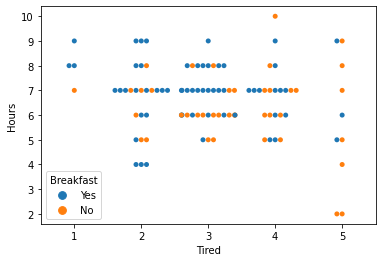

In [17]:
# swarm plot grouped by Tired with different colors for Breakfast
sns.swarmplot(x="Tired",y="Hours",data=df_sleep,hue='Breakfast')
plt.show()

In [18]:
# using plotly
# getting the mean over Tired grouped by Breakfast
fig = px.bar(df_sleep.groupby("Breakfast")["Tired"].mean().reset_index(), x='Breakfast', y='Tired')
fig.show()

Now we can see that breakfast eaters tend to be less tired than those who don’t have breakfast in the morning

In [20]:
# using plotly
# getting the mean over Hours grouped by Tired
fig = px.bar(df_sleep.groupby("Tired")["Hours"].mean().reset_index(), x='Tired', y='Hours', color="Tired", title="the mean of hours slept per tiredness")
fig.show()

and here we can see that on average those who sleep for 8 hours are not tired at all!

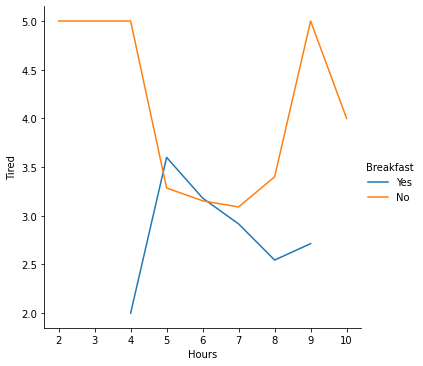

In [21]:
# ploting the relation between being tired and hours of sleep with different colors for Breakfast 
sns.relplot(x="Hours", y="Tired", ci=None, kind="line", hue="Breakfast", data=df_sleep)
plt.show()

## Concluding Remarks
In conclusion, it is clear that having 8 hours of sleep and eating breakfast will let us feel more energized and active throughout the day.